## Impulse Response

In [45]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import time
from datetime import datetime
import scipy.optimize as opt
from scipy.stats import gamma, expon
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
plt.style.use("ggplot")
plt.rcParams["font.size"] = 14
mpl.rcParams["font.family"] = 'Osaka'
mpl.pyplot.rcParams['figure.figsize'] = (6.0, 4.0)
# integer scale (x axis)
from matplotlib.ticker import MaxNLocator

* BTC
$$
\tilde{w}(t+1) = -\epsilon \cdot \tilde{w}(t)
$$


* BCH
$$
\tilde{W}(t+1) = -\frac{\epsilon}{T} \sum_{s=t-T+1}^t \tilde{W}(s)
$$


### Implementation

In [40]:
import numpy as np


class impulse_response:
    def __init__(self):
        return None


    def sim_BTC(self, length=1000, length_zero=2, init_shock=-0.5,
                elasticity=0.7, T=2016, ):

        self.BTC_win_rates = np.zeros(length + length_zero) + init_shock
        for t in range(length_zero, length+length_zero-1):
                self.BTC_win_rates[t+1] = \
                    -elasticity*self.BTC_win_rates[t]

        return None


    def sim_BCH(self, length=1000, length_zero=50, init_shock=-0.5,
                elasticity=0.7, T=144, ):

        self.BCH_win_rates = np.zeros(length + length_zero + T) + init_shock
        coef = elasticity/T
        for t in range(length_zero+T, length+length_zero+T-1):
                self.BCH_win_rates[t+1] = \
                    -coef*self.BCH_win_rates[t-T+1:t+1].sum()
        self.BCH_win_rates = self.BCH_win_rates[T:]

        return None

### Simulation

* Consider the case where there occurs a negative price shock period 0.

* This gives a *positive* shock to the winning rate.
    - Negative price shock -> decrease in hash supply -> higher winning rate to keep block time 10 min.

In [41]:
sim = impulse_response()

#### BTC

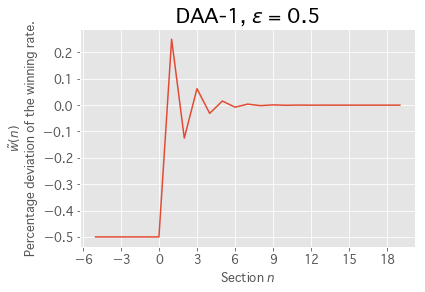

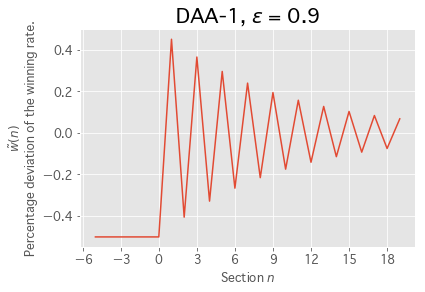

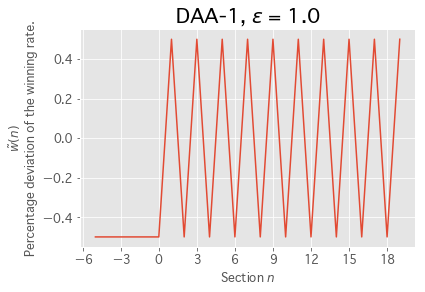

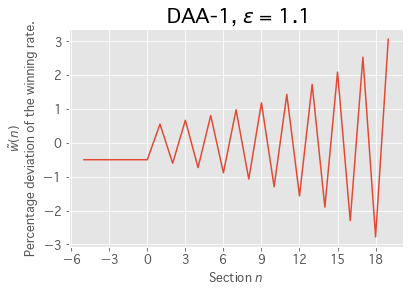

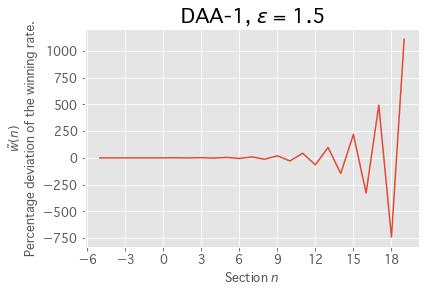

In [46]:
elasticities = [0.5, 0.9, 1.0, 1.1, 1.5]
length = 20
length_zero = 5

for elasticity in elasticities:
    sim.sim_BTC(init_shock=-0.5, elasticity=elasticity, length=length,
                length_zero=length_zero)
    x = np.arange(-length_zero, length)
    plt.plot(x, sim.BTC_win_rates)
    plt.title('DAA-1, $\epsilon$ = {}'.format(elasticity))
    plt.xlabel(r'Section $n$', fontsize=12)
    plt.ylabel(r'$\tilde{w}(n)$''\nPercentage deviation of the winning rate.', fontsize=12)
    # integer scale
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.tick_params(labelsize=12)
    plt.show()

### BCH

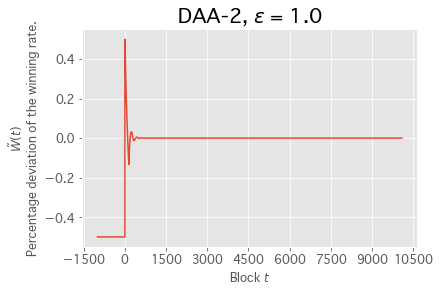

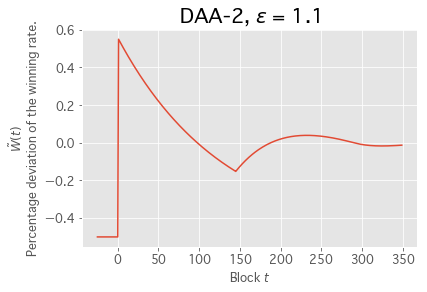

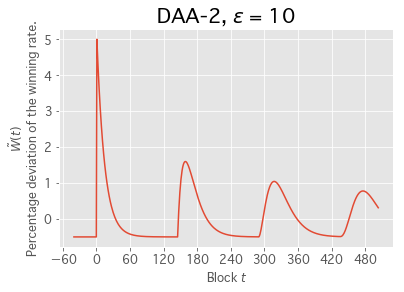

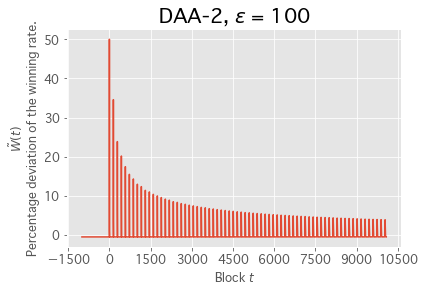

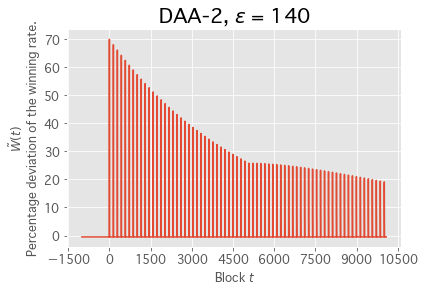

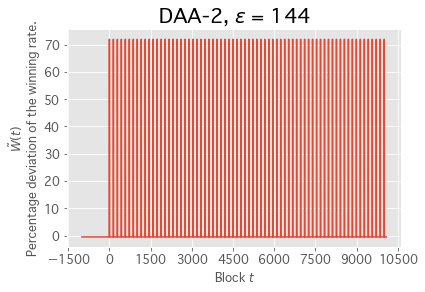

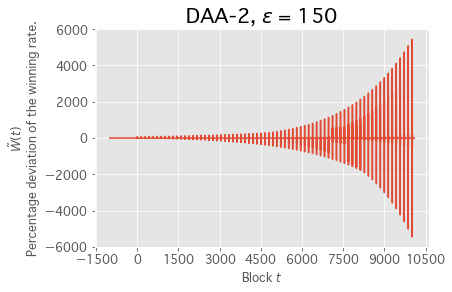

In [47]:
elasticities = [1.0, 1.1, 10, 100, 140, 144, 150]

for elasticity in elasticities:
    if elasticity == 1.1:
        length_zero=25
        length=350
        sim.sim_BCH(init_shock=-0.5, elasticity=elasticity, length=length, length_zero=length_zero)
    elif elasticity == 10:
        length_zero=40
        length=504
        sim.sim_BCH(init_shock=-0.5, elasticity=elasticity, length=length, length_zero=length_zero)
    else:
        length_zero=1000
        length=10080
        sim.sim_BCH(init_shock=-0.5, elasticity=elasticity, length=length, length_zero=length_zero)
    x = np.arange(-length_zero, length)
    plt.plot(x, sim.BCH_win_rates)
    plt.title('DAA-2, $\epsilon$ = {}'.format(elasticity))
    plt.xlabel(r'Block $t$', fontsize=12)
    plt.ylabel(r'$\tilde{W}(t)$''\nPercentage deviation of the winning rate.', fontsize=12)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.tick_params(labelsize=12)
    plt.show()

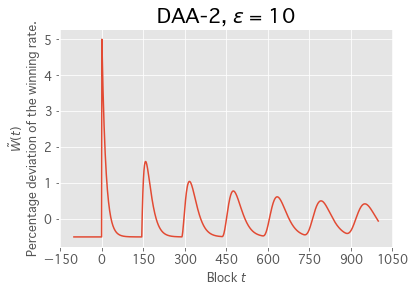

In [50]:
# elasticity=10, length=1000
sim = impulse_response()
elasticity=10
length=1000
length_zero=100
sim.sim_BCH(length=length, length_zero=length_zero, elasticity=elasticity)
x = np.arange(-length_zero, length)
plt.plot(x, sim.BCH_win_rates)
plt.title('DAA-2, $\epsilon$ = {}'.format(elasticity))
plt.xlabel(r'Block $t$', fontsize=12)
plt.ylabel(r'$\tilde{W}(t)$''\nPercentage deviation of the winning rate.', fontsize=12)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=12)
plt.show()

### Change the length of target window $T$

In [23]:
sim = impulse_response()
sim.sim_BCH(T=1000, elasticity=100, length=10080)

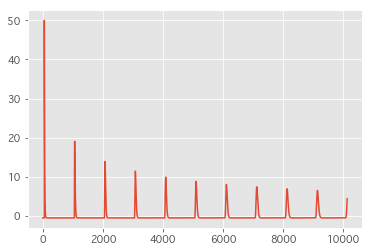

In [24]:
plt.plot(sim.BCH_win_rates)
plt.show()